In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")

In [2]:
red = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
red

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [4]:
for i in range(len(red)):
  if red.quality.iloc[i]<6:
    red.quality.iloc[i] = 0
  if red.quality.iloc[i]>=6:
    red.quality.iloc[i] = 1

In [5]:
red.quality.unique()

array([0, 1])

I divided the class quality into 2, when quality < 6, it is poor quality and when quality >= 6 , it is considered as excellent quality red wine. This makes it a binary classifier and easier to classify the quality of wines.

# 1:

In [6]:
# summary statistics
red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     0.534709  
std       0.154386     0.169507     1.065668     0.498950  
min       2.740000     0.330000     8.400000     0.000000  
25%       3.210000     0.550000     9.500000     0.000000  
50%       3.310000     0.620000    10.200000     1.000000  
75%       3.400000     0.730000    11.100000     1.000000  
max       4.010000     2.000000    14.900000     1.000000

In [7]:
red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
red.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

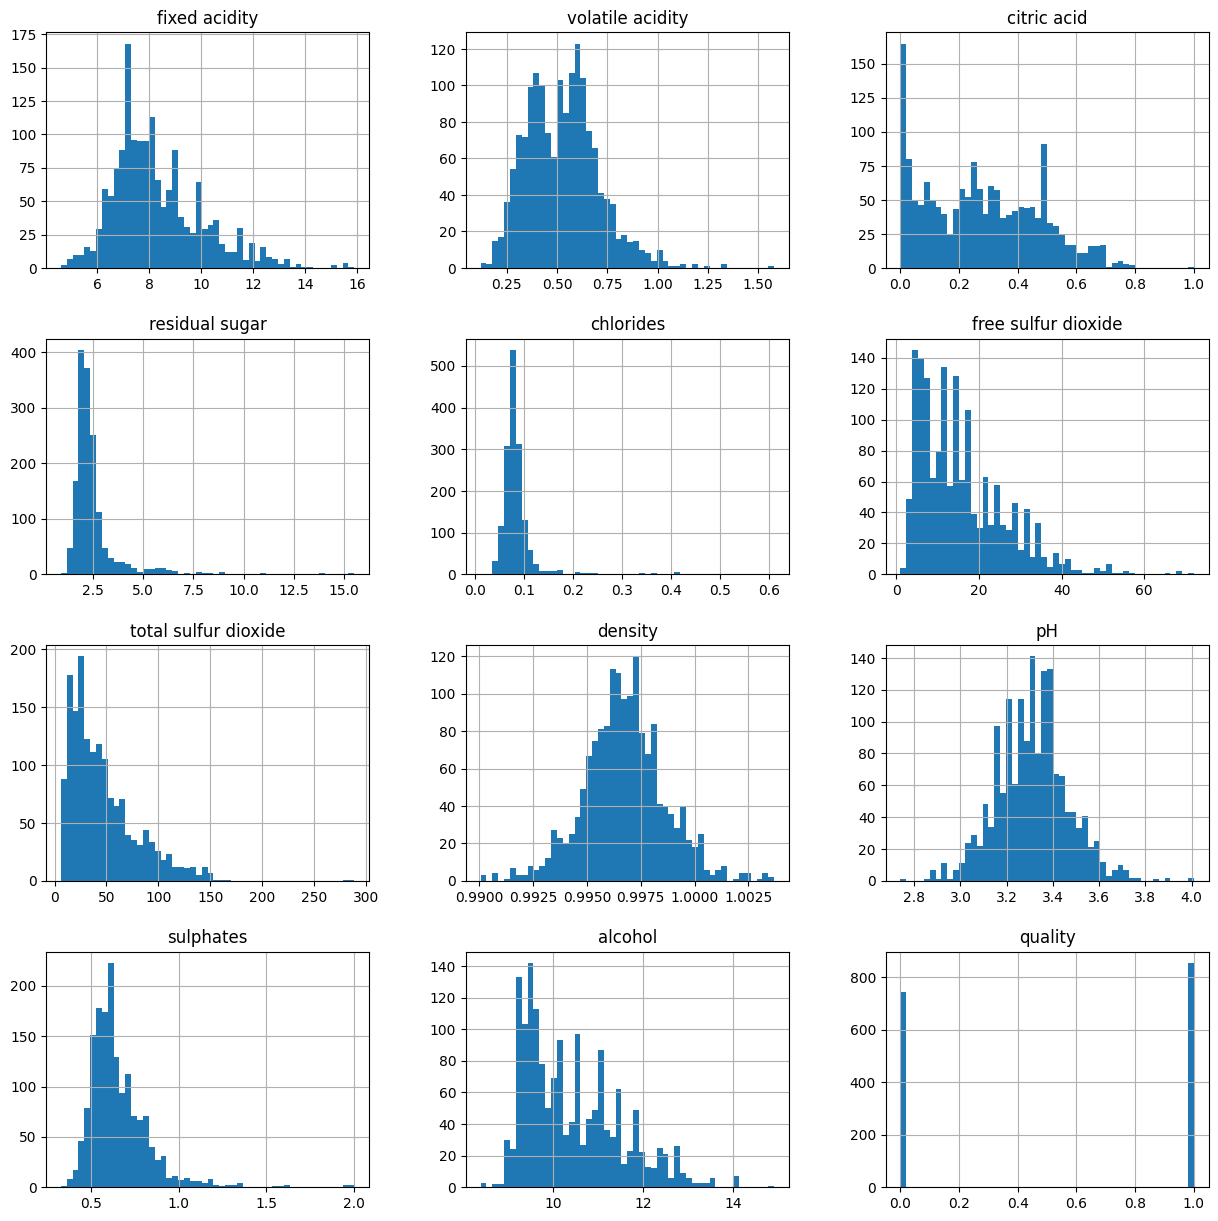

In [10]:
# histograms
red.hist(bins=50, figsize=(15, 15))
plt.show()

<Figure size 2000x1000 with 0 Axes>

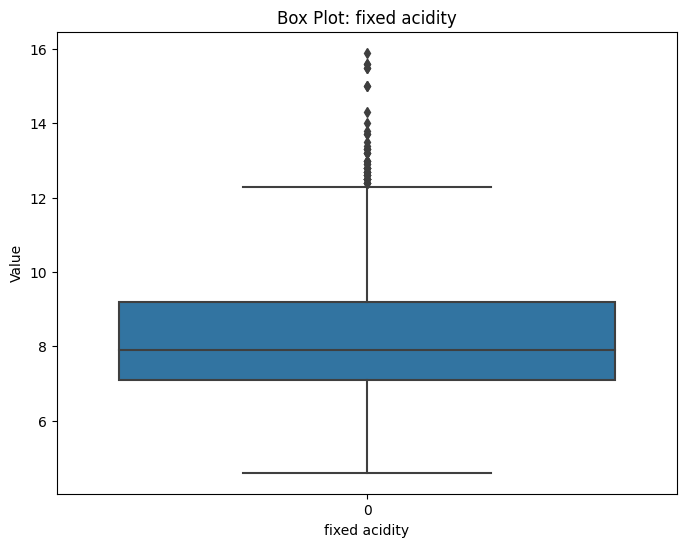

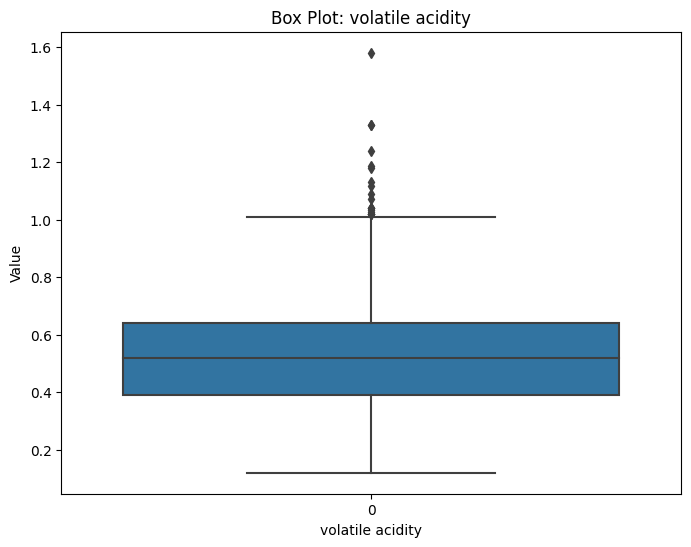

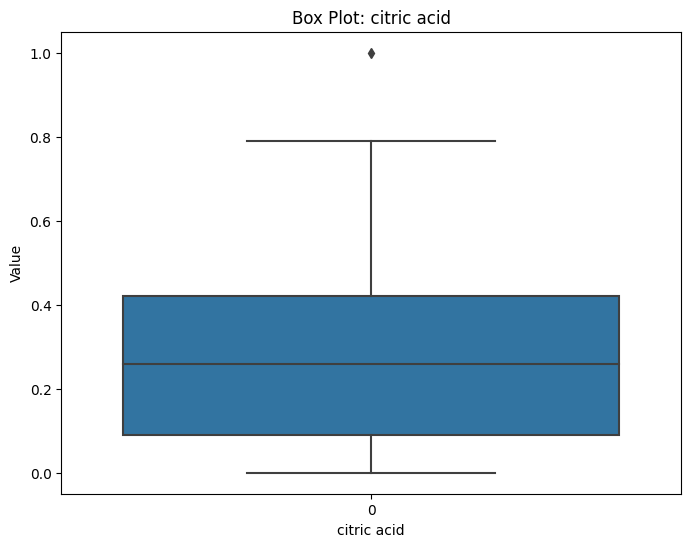

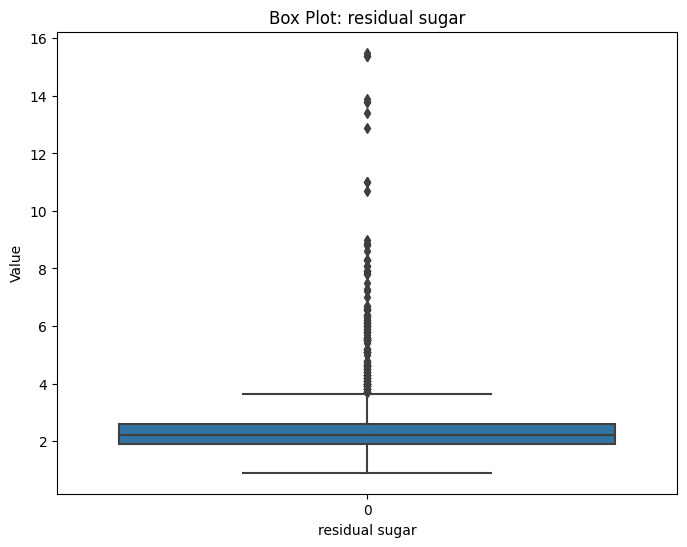

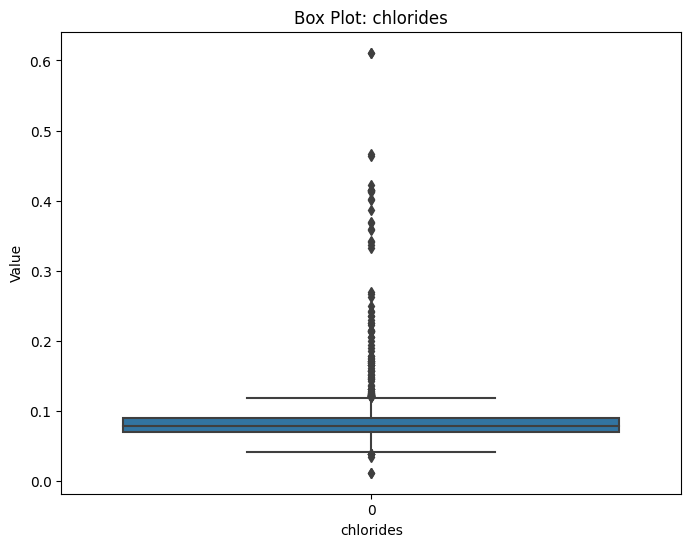

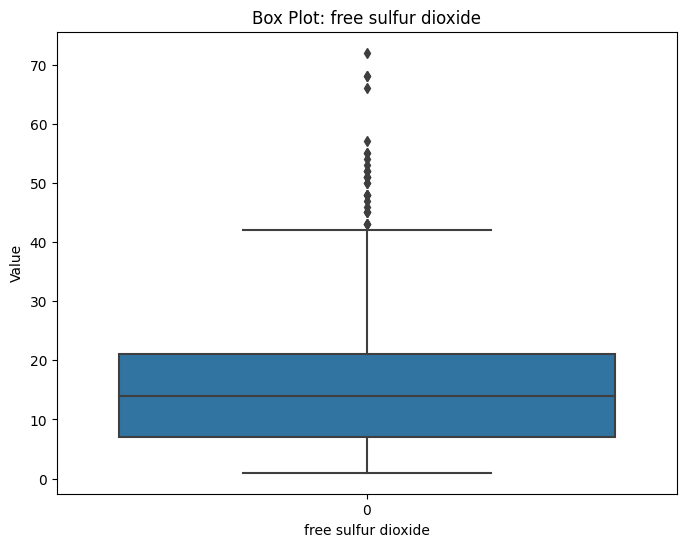

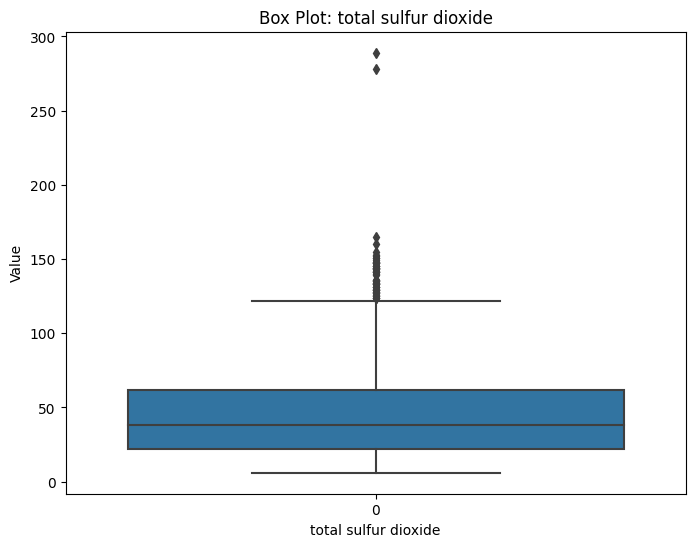

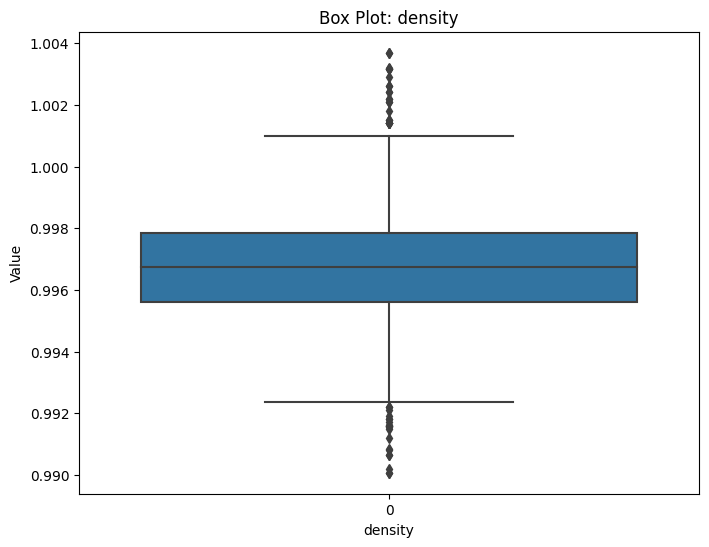

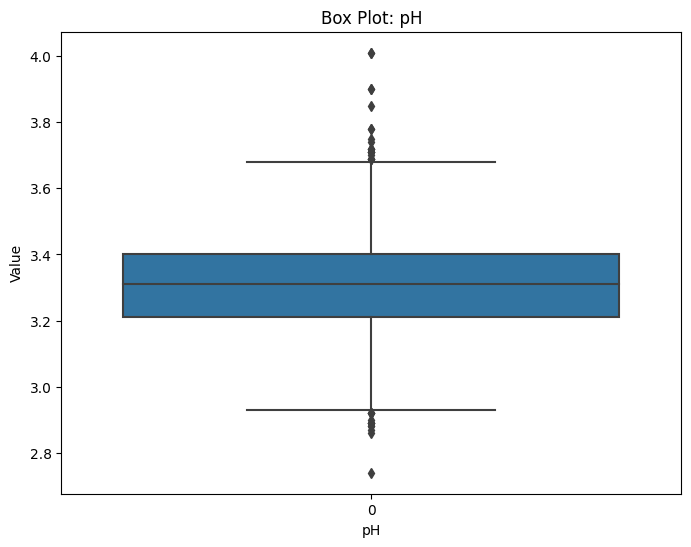

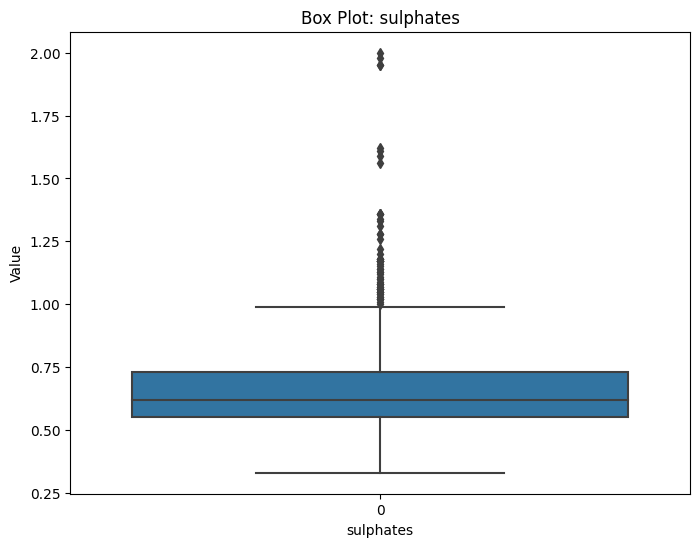

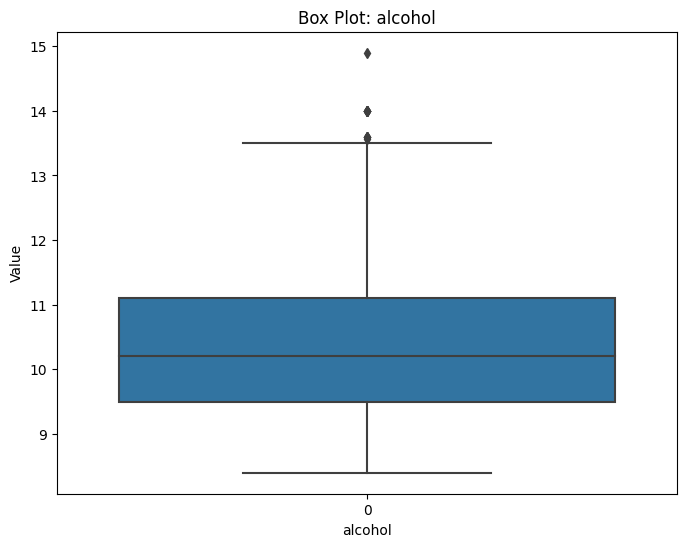

In [11]:
# boxplots

plt.figure(figsize=(20, 10))
for col in red.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=red[col], orient="vertical")
    plt.title(f'Box Plot: {col}')
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.show()

# 1: Solution
The wine quality dataset has 12 features/attributes which predicts the quality of wine: excellent or poor(1 or 0). The data consists of 1599 rows and 12 attributes including the target variable quality. All the attributes are continuous valued. The data has no missing values. This problem is a supervised classification problem. It is a binary classification problem as we are trying to classify the quality of wine based on its features.

The histogram of attributes density and pH are normally distributed, while attributes like residual sugar ,
chlorides , sulphates , alcohol ,free sulfur dioxide and total sulfur dioxide are right skewed. Other attributes like fixed acidity, volatile acidity and citric acid are normal but slightly right skewed. The boxplot also shows the median of all the attributes and outliers if there are any. There are a few outliers in all the features.


There are no categorical attributes that might require special treatment like encoding. All the attributes are continuous valued and we can scale them before applying various classification algorithms.

# 2:

In [12]:
mat_cor = red.corr()

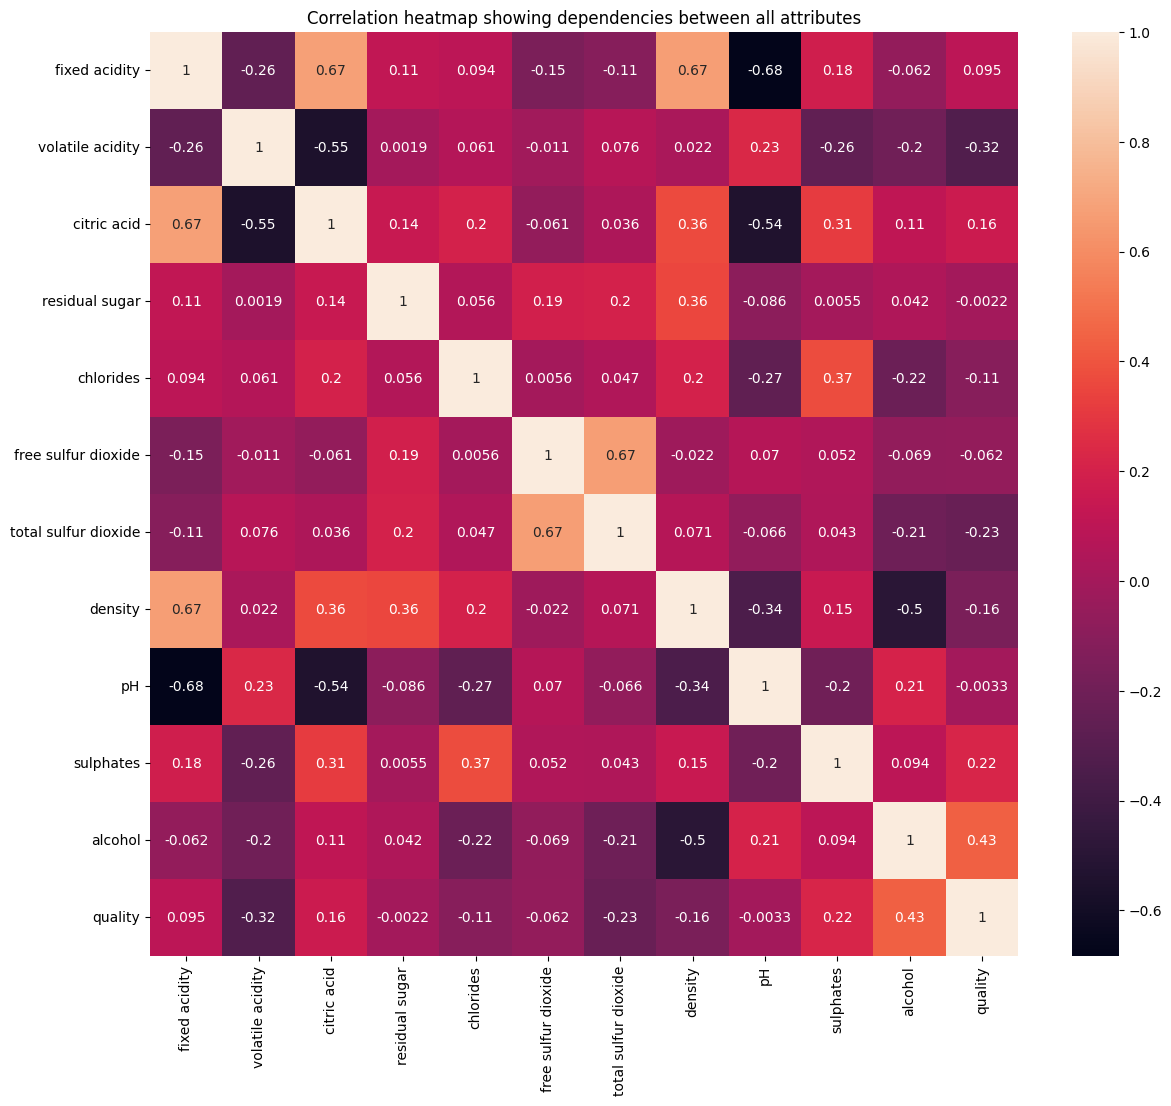

In [13]:
plt.figure(figsize=(14, 12))
sns.heatmap(mat_cor, annot=True)
plt.title('Correlation heatmap showing dependencies between all attributes')
plt.show()

In [14]:
# pearson correlation table
pearson_corr = abs(mat_cor['quality']).sort_values(ascending=False)
pearson_corr

quality                 1.000000
alcohol                 0.434751
volatile acidity        0.321441
total sulfur dioxide    0.231963
sulphates               0.218072
citric acid             0.159129
density                 0.159110
chlorides               0.109494
fixed acidity           0.095093
free sulfur dioxide     0.061757
pH                      0.003264
residual sugar          0.002160
Name: quality, dtype: float64

In [15]:
red.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

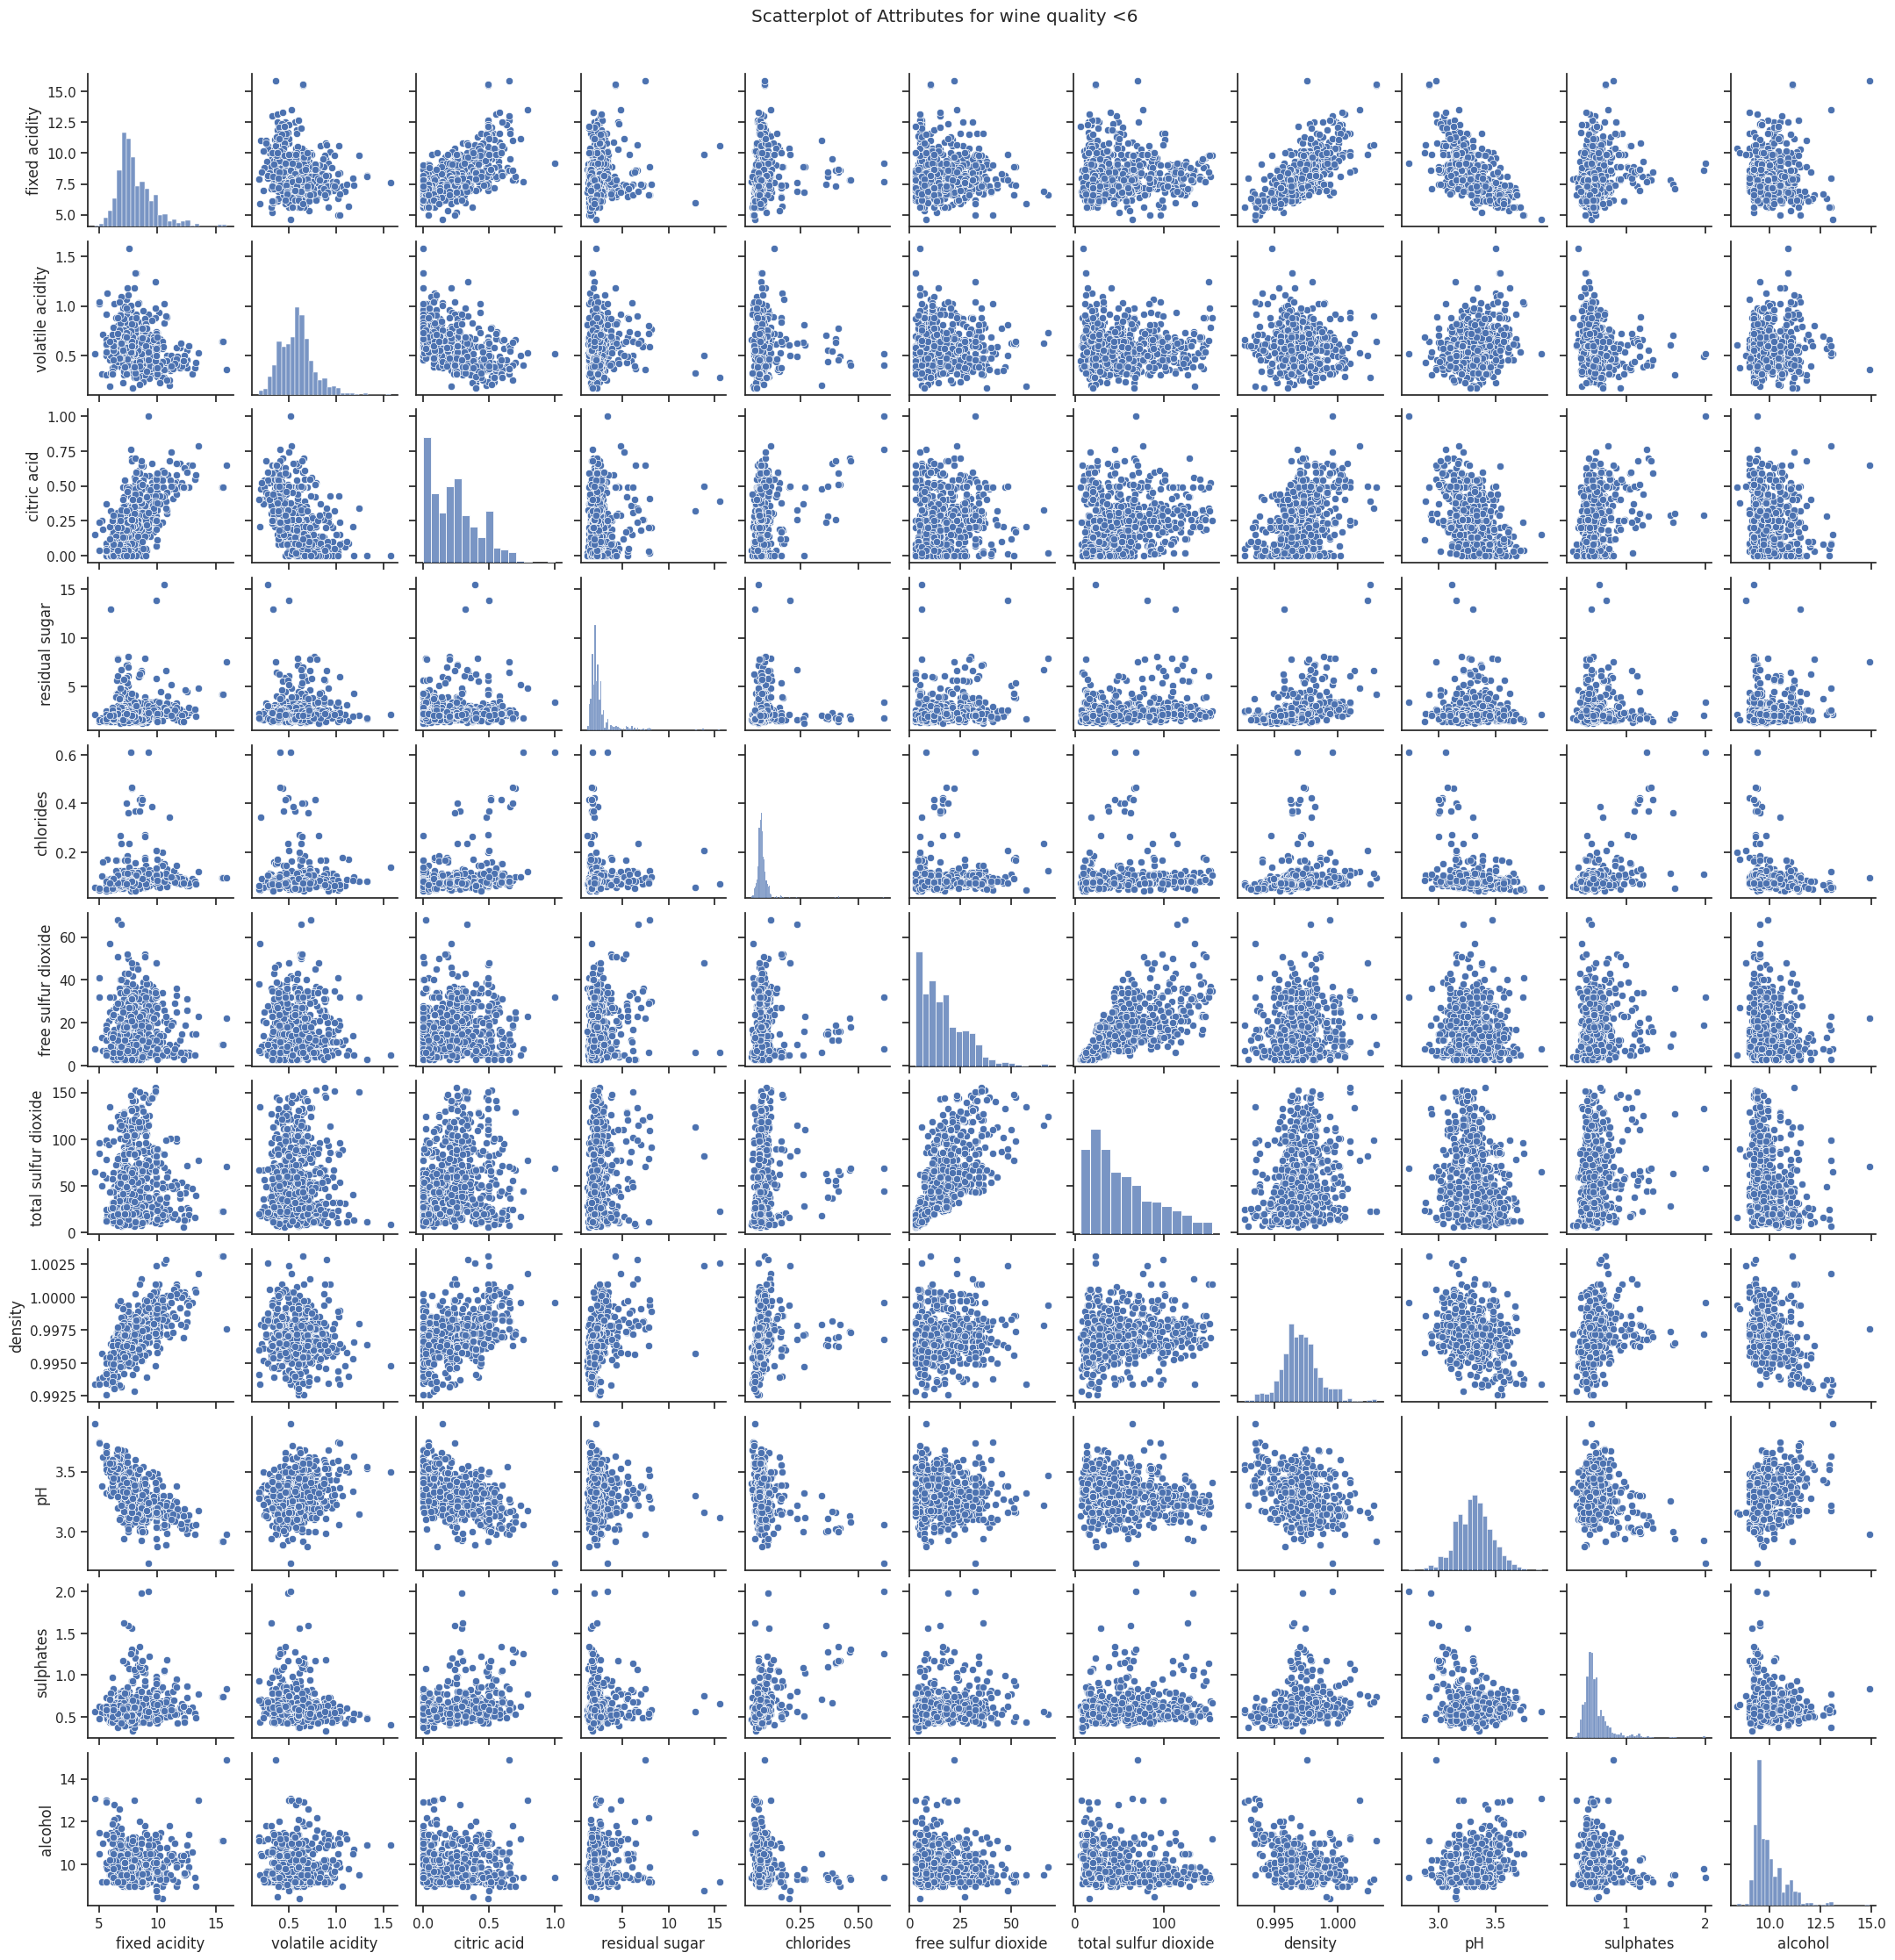

In [16]:
q0 = red[red.quality == 0]
label = 'quality'
scat_vars = q0.columns.tolist()
scat_vars.remove(label)
data_subset = q0[scat_vars]
sns.set(style="ticks")
sns.pairplot(data_subset, height=2)
plt.suptitle("Scatterplot of Attributes for wine quality <6 ", y=1.02)
plt.show()

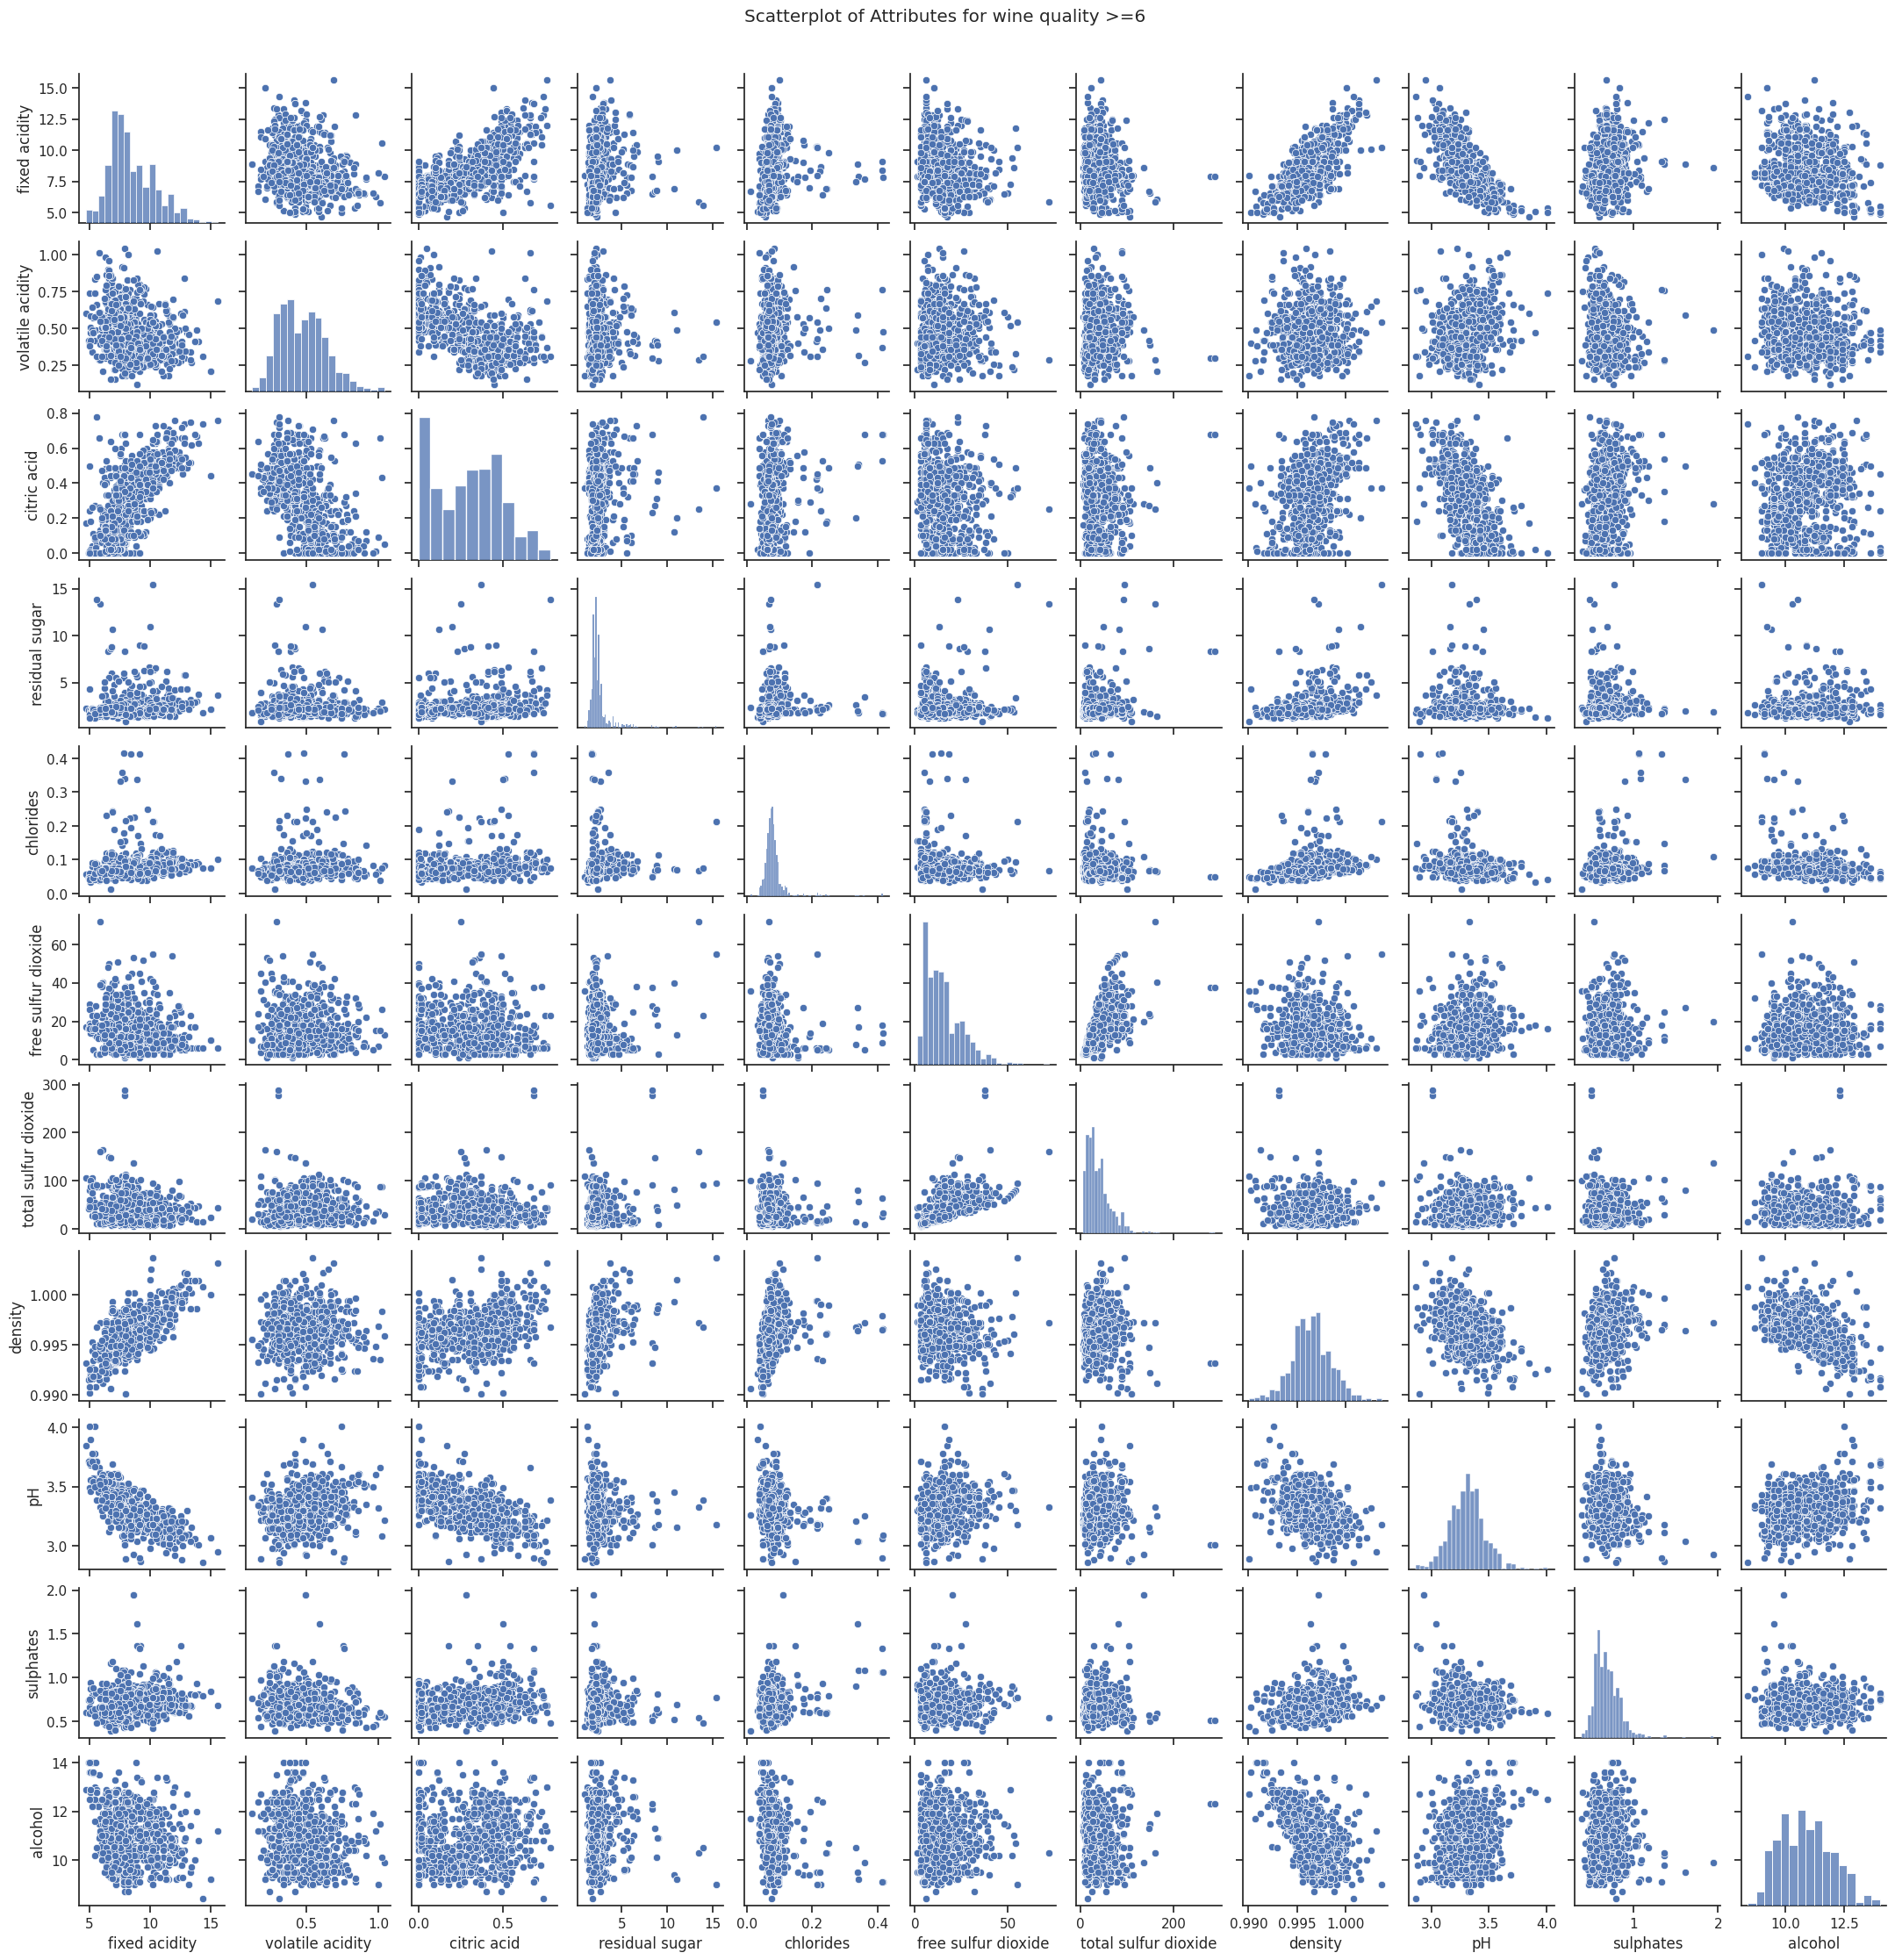

In [17]:
q1 = red[red.quality == 1]
label = 'quality'
scat_vars = q1.columns.tolist()
scat_vars.remove(label)
data_subset = q1[scat_vars]
sns.set(style="ticks")
sns.pairplot(data_subset, height=2)
plt.suptitle("Scatterplot of Attributes for wine quality >=6 ", y=1.02)
plt.show()

# 2: Solution:

The correlation heatmap shows the correlation between every attributes. The darker the color goes, the more correlated it is with another feature. From this we can analyse a few things:

1. Quality is highly correlated to alcohol and negatively correlated to volatile acidity.
2. Alcohol and density are highly correlated.
3. pH is negatively correlated to fixed acidity and citric acid.
4. Density is correlated to fixed acidity.


The scatterplots are a good way to show the relationships between two attributes visually: From scatter and PCC table,

From pairplot1, we see that scatterplot of attributes for wine quality < 6(0), fixed acidity is correlated to density and citric acid and density and citric acid are also correlated.

From pairplot2, we observe interesting aspects: apart from previous correlations, alcohol is nicely correlated with pH. Citric acid and volatile acidity are negatively correlated. Density is slightly negatively correlated to alcohol. This means that good quality red wine has correlation between alcohol, pH, and if these values are high the density is low, this also means that it has high amount of citric acid and fixed acidity.

Since fixed acidity and citric acid is correlated to density, we eleinate those two features. This way the features with least correlation and importance are also eliminated during feature selection to get the best possible features to be passed to the model for classifications.

# 3:

# Feature Engineering

In [18]:
logr=LogisticRegression(C=0.01, solver='saga', penalty='l1', random_state=42, max_iter=100)

In [30]:
# recursive feature elimination
def recursivefeat_eli(model,n_feat):
  rfe = RFE(model,n_features_to_select=n_feat)
  rfe.fit(X_train,y_train) # call it after scaling X_train,y_train
  col_to_drop = []
  for i, j in zip(red.iloc[:,:-1].columns,rfe.support_):
      if j==False:
          col_to_drop.append(i)
  return col_to_drop

In [31]:
# recursivefeat_eli(logr, 8)

['fixed acidity', 'citric acid', 'residual sugar']

The above function recursivefeat_eli is used to determine the features to eliminate based on a model. To use this function, we first consider all the features and it provides us with a list of features that are least important. We pass the number of features to select and retain. I used logr logisitc regression with lasso penalty and solver saga with more regression parameter C =0.01 because lasso helps in eliminating feature and thus gives features which are only releveant. This is done by the function recursivefeat_eli.
This results matched with my correlation elimination and scatterplots. So I decided to drop a few features suggested by RFE and manual selection to achieve best performance.



In [32]:
red.drop(columns=['citric acid', 'residual sugar','fixed acidity' ], inplace=True)

In [33]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)
for train_index, test_valid_index in sss.split(red.drop(columns=['quality']), red['quality']):
    s_train_set = red.iloc[train_index]
    s_test_valid_set = red.iloc[test_valid_index]

In [34]:
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for test_index, valid_index in sss2.split(s_test_valid_set.drop(columns=['quality']), s_test_valid_set['quality']):
    s_test_set = s_test_valid_set.iloc[test_index]
    s_valid_set = s_test_valid_set.iloc[valid_index]

In [35]:
print(s_train_set.shape)
print(s_test_set.shape)
print(s_valid_set.shape)

(959, 9)
(320, 9)
(320, 9)


In [36]:
def proportions(data):
    return data['quality'].value_counts() / len(data)

train_set, test_valid_set = train_test_split(red, test_size=0.4, random_state=42)
test_set, valid_set = train_test_split(test_valid_set, test_size=0.5, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": proportions(red),
    "Stratified test%": proportions(s_test_set),
    "Random test%": proportions(test_set),
      "Stratified validation%": proportions(s_valid_set),
    "Random validation%": proportions(valid_set),
}).sort_index()
compare_props.index.name = 'quality'
compare_props["Strat. Error test%"] = (compare_props["Stratified test%"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error test%"] = (compare_props["Random test%"] /
                                  compare_props["Overall %"] - 1)
compare_props["Strat. Error validation%"] = (compare_props["Stratified validation%"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error validation%"] = (compare_props[ "Random validation%"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

Overall %  Stratified test%  Random test%  Stratified validation%  \
quality                                                                      
0            46.53             46.56         48.44                   46.56   
1            53.47             53.44         51.56                   53.44   

         Random validation%  Strat. Error test%  Rand. Error test%  \
quality                                                              
0                     46.25                0.07               4.10   
1                     53.75               -0.06              -3.57   

         Strat. Error validation%  Rand. Error validation%  
quality                                                     
0                            0.07                    -0.60  
1                           -0.06                     0.52

In [37]:
y_train = np.array(s_train_set['quality'])
X_train = np.array(s_train_set.drop(columns=['quality']))

In [38]:
y_test = np.array(s_test_set['quality'])
X_test = np.array(s_test_set.drop(columns=['quality']))

In [39]:
X_valid = np.array(s_valid_set.drop(columns=['quality']))
y_valid = np.array(s_valid_set['quality'])

In [40]:
y_test.shape

(320,)

# 3: Solution
The quality attribute is  used  as a variable to perform stratified splitting method as it has 2 categories. This sampling method takes the stratified samples of the data and spilts it as number of times as mentioned in the test size. Here I have mentioned 0.4, which means 40 percent of the data is being stratified shuffled and split from the whole population and 60 percent is used for training. In sss2, I have used test size 0.5 on the test_valid set(0.4 of sss), to split into 0.2 test and 0.2 validation data. To perform this, we should have categories of the splitting variable to handle the Stratifed shuffle split. Now we have 60 percent data for training, 20 percent for testing and 20 percent for validation.

In a stratified sample, we divide a population into homogeneous subpopulations called strata  based on specific attributes of the data. Once the strata test and strata train data are obtained, we find the proportions of 'quality' in the whole data and the samples obtained using various sampling methods. The table shows that in each label of quality, the overall population ratio,stratifed ratio, and error values are shown. The first row represents when the quality is 0, we have the overall proportion of population as 46.53, the stratified proportion(sample test) is	46.56, by randomizing we get	48.44 and the stratied error is	0.07 Similarly, validation scores can also been seen from the table. From these values we say that, sample test set and sample validation is representative of the population data. This can be verified using .describe tables too. We then create a training, validation and  testing sets, from stratas.

# 4:

In [41]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [42]:
pd.DataFrame(X_train).describe()

0             1             2             3             4  \
count  9.590000e+02  9.590000e+02  9.590000e+02  9.590000e+02  9.590000e+02   
mean  -3.436019e-16  2.963682e-17 -3.704602e-17  3.704602e-18  5.033814e-14   
std    1.000522e+00  1.000522e+00  1.000522e+00  1.000522e+00  1.000522e+00   
min   -2.282649e+00 -1.729592e+00 -1.449890e+00 -1.176797e+00 -3.521135e+00   
25%   -7.670096e-01 -3.856316e-01 -8.521710e-01 -6.932912e-01 -6.202618e-01   
50%   -3.725734e-02 -1.539144e-01 -1.548316e-01 -2.702233e-01 -1.700614e-02   
75%    6.082927e-01  7.780286e-02  5.425078e-01  4.248167e-01  5.652667e-01   
max    4.509660e+00  8.813542e+00  5.623123e+00  7.344998e+00  3.623511e+00   

                  5             6             7  
count  9.590000e+02  9.590000e+02  9.590000e+02  
mean   7.844496e-16  4.927121e-16 -7.761142e-16  
std    1.000522e+00  1.000522e+00  1.000522e+00  
min   -2.953739e+00 -1.775860e+00 -1.878227e+00  
25%   -6.740828e-01 -6.591059e-01 -8.620760e-01  
50%   -2.275242e-02 -2.248128e-01 -2.154347e-01  
75%    5.634449e-01  4.576477e-01  6.159612e-01  
max    4.536560e+00  8.026756e+00  4.126300e+00

In [43]:
pd.DataFrame(X_test).describe()

0           1           2           3           4           5  \
count  320.000000  320.000000  320.000000  320.000000  320.000000  320.000000   
mean     0.021596    0.069113    0.073360    0.013459   -0.064955    0.045841   
std      0.996886    1.405605    1.083212    0.966497    0.983647    1.017777   
min     -2.058110   -1.729592   -1.250651   -1.207016   -3.222130   -3.735335   
25%     -0.823144   -0.385632   -0.852171   -0.753729   -0.674030   -0.608950   
50%      0.018877   -0.177086   -0.154832   -0.209785   -0.043235    0.009814   
75%      0.664427    0.100975    0.741748    0.492810    0.586250    0.628578   
max      2.657212   12.150270    5.025404    3.204977    3.340243    3.820097   

                6           7  
count  320.000000  320.000000  
mean     0.071243   -0.013792  
std      1.297149    0.954402  
min     -1.775860   -1.878227  
25%     -0.659106   -0.862076  
50%     -0.224813   -0.215435  
75%      0.519690    0.615961  
max      8.336965    3.294904

# Logistic regression

In [44]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': [ 'lbfgs',  'newton-cg','sag', 'saga'],
    'max_iter': [ 100, 200, 300]
}

In [45]:
train_lg=[]
val_lg=[]
for miter in param_grid['max_iter']:
  for sol in param_grid['solver']:
    for c in param_grid['C']:
      softmax_reg = LogisticRegression( C = c, solver = sol,max_iter = miter)
      softmax_reg.fit(X_train, y_train)
      train_lg.append((softmax_reg.score(X_train, y_train),(c,sol,miter)))
      val_lg.append((softmax_reg.score(X_valid, y_valid),(c,sol,miter)))

In [46]:
val_lg

[(0.721875, (0.001, 'lbfgs', 100)),
 (0.74375, (0.01, 'lbfgs', 100)),
 (0.746875, (0.1, 'lbfgs', 100)),
 (0.746875, (1, 'lbfgs', 100)),
 (0.746875, (10, 'lbfgs', 100)),
 (0.721875, (0.001, 'newton-cg', 100)),
 (0.74375, (0.01, 'newton-cg', 100)),
 (0.746875, (0.1, 'newton-cg', 100)),
 (0.746875, (1, 'newton-cg', 100)),
 (0.746875, (10, 'newton-cg', 100)),
 (0.721875, (0.001, 'sag', 100)),
 (0.74375, (0.01, 'sag', 100)),
 (0.746875, (0.1, 'sag', 100)),
 (0.746875, (1, 'sag', 100)),
 (0.746875, (10, 'sag', 100)),
 (0.721875, (0.001, 'saga', 100)),
 (0.74375, (0.01, 'saga', 100)),
 (0.746875, (0.1, 'saga', 100)),
 (0.746875, (1, 'saga', 100)),
 (0.746875, (10, 'saga', 100)),
 (0.721875, (0.001, 'lbfgs', 200)),
 (0.74375, (0.01, 'lbfgs', 200)),
 (0.746875, (0.1, 'lbfgs', 200)),
 (0.746875, (1, 'lbfgs', 200)),
 (0.746875, (10, 'lbfgs', 200)),
 (0.721875, (0.001, 'newton-cg', 200)),
 (0.74375, (0.01, 'newton-cg', 200)),
 (0.746875, (0.1, 'newton-cg', 200)),
 (0.746875, (1, 'newton-cg', 200))

In [47]:
idx=[]
for i in range(len(val_lg)):
  idx.append(val_lg[i][0])
print(f'Best model hyperparameters: {val_lg[np.argmax(idx)]}')

Best model hyperparameters: (0.746875, (0.1, 'lbfgs', 100))


From the val_lg, we see that, when there is less value of C, more regularisation, then the accuracy is low. But when C is optimal, say 0.1, 1, or 10, there is optimal regularisation applied. The solver chosen is default as it does not affect the accuracy. The max_iter does not affect the accuracy as well.

Based on this and since the best model hyperparamters is based on the highest validation accuracy and the lowest difference between validation and training accuracy, I have chosen the best model parameters as:  C = 0.1, solver='lbfgs', max_iter = 100, random_state=42

In [48]:
# using the best model hyperparameters: C = 0.1, solver='lbfgs', max_iter = 100, random_state=42
softmax_reg = LogisticRegression(C = 0.1, solver='lbfgs', max_iter = 100, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=42)

In [49]:
y_pred_train = softmax_reg.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train, average='weighted')
recall = recall_score(y_train, y_pred_train, average='weighted')
f1 = f1_score(y_train, y_pred_train, average='weighted')

print('Model performance on Training set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Training set
Accuracy: 0.7518
Precision: 0.7527
Recall: 0.7518
F1 Score: 0.7520


In [50]:
y_pred_valid = softmax_reg.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_valid)
precision = precision_score(y_valid, y_pred_valid, average='weighted')
recall = recall_score(y_valid, y_pred_valid, average='weighted')
f1 = f1_score(y_valid, y_pred_valid, average='weighted')

print('Model performance on Validation set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Validation set
Accuracy: 0.7469
Precision: 0.7486
Recall: 0.7469
F1 Score: 0.7472


In [51]:
y_pred = softmax_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Model performance on Test set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Test set
Accuracy: 0.7281
Precision: 0.7277
Recall: 0.7281
F1 Score: 0.7276


We can observe that the training accuracy is 75.18 percent, and validation accuracy is 74.69 percent. There is no overfitting observed. The test also gives accuracy of 72.81 percent which is quite good for logistic regression on this dataset.

# Support vector machine

In [52]:
param_grid = {
    'C': [0.001, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf','sigmoid'],
    'degree': [2, 3, 4, 10],
    'gamma': ['scale', 'auto', 0.1, 1]
}

In [53]:
train_svm=[]
val_svm=[]
for deg in param_grid['degree']:
  for gam in param_grid['gamma']:
    for ker in param_grid['kernel']:
      for c in param_grid['C']:
        support_vec= SVC(C = c, kernel = ker ,degree = deg, gamma = gam)
        support_vec.fit(X_train, y_train)
        train_svm.append((support_vec.score(X_train, y_train),(deg, gam, ker, c)))
        val_svm.append((support_vec.score(X_valid, y_valid),(deg, gam, ker, c)))

In [54]:
val_svm

[(0.73125, (2, 'scale', 'linear', 0.001)),
 (0.753125, (2, 'scale', 'linear', 0.1)),
 (0.759375, (2, 'scale', 'linear', 1)),
 (0.759375, (2, 'scale', 'linear', 10)),
 (0.759375, (2, 'scale', 'linear', 100)),
 (0.534375, (2, 'scale', 'poly', 0.001)),
 (0.609375, (2, 'scale', 'poly', 0.1)),
 (0.628125, (2, 'scale', 'poly', 1)),
 (0.63125, (2, 'scale', 'poly', 10)),
 (0.634375, (2, 'scale', 'poly', 100)),
 (0.534375, (2, 'scale', 'rbf', 0.001)),
 (0.75625, (2, 'scale', 'rbf', 0.1)),
 (0.75, (2, 'scale', 'rbf', 1)),
 (0.75625, (2, 'scale', 'rbf', 10)),
 (0.746875, (2, 'scale', 'rbf', 100)),
 (0.534375, (2, 'scale', 'sigmoid', 0.001)),
 (0.725, (2, 'scale', 'sigmoid', 0.1)),
 (0.653125, (2, 'scale', 'sigmoid', 1)),
 (0.63125, (2, 'scale', 'sigmoid', 10)),
 (0.634375, (2, 'scale', 'sigmoid', 100)),
 (0.73125, (2, 'auto', 'linear', 0.001)),
 (0.753125, (2, 'auto', 'linear', 0.1)),
 (0.759375, (2, 'auto', 'linear', 1)),
 (0.759375, (2, 'auto', 'linear', 10)),
 (0.759375, (2, 'auto', 'linear', 

In [55]:
idx=[]
for i in range(len(val_svm)):
  idx.append(val_svm[i][0])
for i in val_svm:
  if i[0]==max(idx):
    print(i)
print(f'Best model hyperparameters: {val_svm[np.argmax(idx)]}')

(0.76875, (3, 'scale', 'poly', 0.1))
(0.76875, (3, 'auto', 'poly', 0.1))
Best model hyperparameters: (0.76875, (3, 'scale', 'poly', 0.1))


From the val_svm, we see that, when there is less value of C, more regularisation, then the accuracy is low. C does not affect the accuracy. The kernel chosen is poly, since linear, does not work well with this dataset. Since the kernel is  poly, the  degree chosen is 3 as higher degree might require some regularisation for poly. The gamma is auto or scale as sigmoid gives low accuracy.

Based on this and since the best model hyperparamters is based on the highest validation accuracy and the lowest difference between validation and training accuracy, I have chosen the best model parameters as:  C =0.1, kernel = 'poly' ,degree = 3, gamma = 'scale',probability=True, random_state =42

In [56]:
# using the best hyperparameters C =0.1, kernel = 'poly' ,degree = 3, gamma = 'scale',probability=True, random_state =42
support_vec = SVC(C =0.1, kernel = 'poly' ,degree = 3, gamma = 'scale',probability=True, random_state =42)
support_vec.fit(X_train, y_train)

SVC(C=0.1, kernel='poly', probability=True, random_state=42)

In [57]:
y_pred_train = support_vec.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train, average='weighted')
recall = recall_score(y_train, y_pred_train, average='weighted')
f1 = f1_score(y_train, y_pred_train, average='weighted')

print('Model performance on Training set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Training set
Accuracy: 0.7445
Precision: 0.7574
Recall: 0.7445
F1 Score: 0.7378


In [58]:
y_pred_valid = support_vec.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_valid)
precision = precision_score(y_valid, y_pred_valid, average='weighted')
recall = recall_score(y_valid, y_pred_valid, average='weighted')
f1 = f1_score(y_valid, y_pred_valid, average='weighted')

print('Model performance on Validation set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Validation set
Accuracy: 0.7688
Precision: 0.7783
Recall: 0.7688
F1 Score: 0.7643


In [59]:
y_pred = support_vec.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Model performance on Test set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Test set
Accuracy: 0.7125
Precision: 0.7231
Recall: 0.7125
F1 Score: 0.7046


We can observe that the training accuracy is 74.45 percent, and validation accuracy is 76.88 percent. There is no overfitting/underfitting observed. The test also gives accuracy of 71.25 percent which is quite good for SVM on this dataset.

# Random Forest

In [60]:
param_grid = {
    'max_features' : ['sqrt', 'log2', None, 5],
    'n_estimators': [50, 100, 500],
    'max_depth': [None, 2, 10, 100, 300],
    'min_samples_split': [2, 5, 10, 100],
    'min_samples_leaf': [1, 2, 10, 100],
}

In [61]:
train_rf=[]
val_rf=[]
for feat in param_grid['max_features']:
  for est in param_grid['n_estimators']:
    for dep in param_grid['max_depth']:
      for sp in param_grid['min_samples_split']:
        for leaf in param_grid['min_samples_leaf']:
          rf= RandomForestClassifier(n_estimators = est,max_depth=dep, min_samples_split =sp, min_samples_leaf=leaf, max_features=feat, random_state =42)
          rf.fit(X_train, y_train)
          train_rf.append((rf.score(X_train, y_train),(feat,est, dep, sp, leaf)))
          val_rf.append((rf.score(X_valid, y_valid),(feat, est, dep, sp, leaf)))

In [62]:
val_rf

[(0.7875, ('sqrt', 50, None, 2, 1)),
 (0.76875, ('sqrt', 50, None, 2, 2)),
 (0.765625, ('sqrt', 50, None, 2, 10)),
 (0.74375, ('sqrt', 50, None, 2, 100)),
 (0.7875, ('sqrt', 50, None, 5, 1)),
 (0.75625, ('sqrt', 50, None, 5, 2)),
 (0.765625, ('sqrt', 50, None, 5, 10)),
 (0.74375, ('sqrt', 50, None, 5, 100)),
 (0.75625, ('sqrt', 50, None, 10, 1)),
 (0.753125, ('sqrt', 50, None, 10, 2)),
 (0.765625, ('sqrt', 50, None, 10, 10)),
 (0.74375, ('sqrt', 50, None, 10, 100)),
 (0.74375, ('sqrt', 50, None, 100, 1)),
 (0.746875, ('sqrt', 50, None, 100, 2)),
 (0.746875, ('sqrt', 50, None, 100, 10)),
 (0.74375, ('sqrt', 50, None, 100, 100)),
 (0.728125, ('sqrt', 50, 2, 2, 1)),
 (0.728125, ('sqrt', 50, 2, 2, 2)),
 (0.728125, ('sqrt', 50, 2, 2, 10)),
 (0.73125, ('sqrt', 50, 2, 2, 100)),
 (0.728125, ('sqrt', 50, 2, 5, 1)),
 (0.728125, ('sqrt', 50, 2, 5, 2)),
 (0.728125, ('sqrt', 50, 2, 5, 10)),
 (0.73125, ('sqrt', 50, 2, 5, 100)),
 (0.728125, ('sqrt', 50, 2, 10, 1)),
 (0.728125, ('sqrt', 50, 2, 10, 2))

In [63]:
idx=[]
for i in range(len(val_rf)):
  idx.append(val_rf[i][0])
for i in val_rf:
  if i[0]==max(idx):
    print(i)
print(f'Best model hyperparameters: {val_rf[np.argmax(idx)]}')

(0.7875, ('sqrt', 50, None, 2, 1))
(0.7875, ('sqrt', 50, None, 5, 1))
(0.7875, ('sqrt', 50, 100, 2, 1))
(0.7875, ('sqrt', 50, 100, 5, 1))
(0.7875, ('sqrt', 50, 300, 2, 1))
(0.7875, ('sqrt', 50, 300, 5, 1))
(0.7875, ('log2', 50, None, 2, 1))
(0.7875, ('log2', 50, 100, 2, 1))
(0.7875, ('log2', 50, 300, 2, 1))
(0.7875, ('log2', 100, None, 2, 2))
(0.7875, ('log2', 100, 100, 2, 2))
(0.7875, ('log2', 100, 300, 2, 2))
(0.7875, (5, 500, None, 2, 1))
(0.7875, (5, 500, 100, 2, 1))
(0.7875, (5, 500, 300, 2, 1))
Best model hyperparameters: (0.7875, ('sqrt', 50, None, 2, 1))


From the val_rf, we see that, there is no significant increase with change in max features,so we keep the default max features sqrt. The number of trees is 50 since the algorithm gives good values within 50 trees so there is no need to use 300 or even 500 trees that might produce similar results. The max_depth used arbitrarly None, instead of using 100 or 300 which gives similar results. Even if the depth of tree is say 300, then the leaf samples must be still low as possible to acheive good performance. The  minimum number of samples required to split an internal node is 2 samples by default. The minimum samples on the leaf node must be low, 1 or 2 for achieving good performance.

Based on this and since the best model hyperparamters is based on the highest validation accuracy and the lowest difference between validation and training accuracy, I have chosen the best model parameters as:  max_features = 'sqrt',n_estimators=50,  max_depth=None, min_samples_split=2, min_samples_leaf=1, n_jobs=-1, random_state=42

In [64]:
# using the best hyperparamaters max_features = 'sqrt',n_estimators=50,  max_depth=None, min_samples_split=2, min_samples_leaf=1, n_jobs=-1, random_state=42
randomf = RandomForestClassifier(max_features = 'sqrt',n_estimators=50,  max_depth=None, min_samples_split=2, min_samples_leaf=1, n_jobs=-1, random_state=42)
randomf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [65]:
feature_importance = randomf.feature_importances_
feat= red.columns
feature_importance_list = list(zip(feat,feature_importance))
sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

[('alcohol', 0.20801831468604728),
 ('sulphates', 0.15821810181408666),
 ('volatile acidity', 0.13182913484437797),
 ('total sulfur dioxide', 0.1268787381770432),
 ('density', 0.10514498211306378),
 ('chlorides', 0.10041467558452853),
 ('pH', 0.08721687908687231),
 ('free sulfur dioxide', 0.0822791736939803)]

In [66]:
feat_names, feat_importance = zip(*(sorted(feature_importance_list, key=lambda x: x[1], reverse=True)))

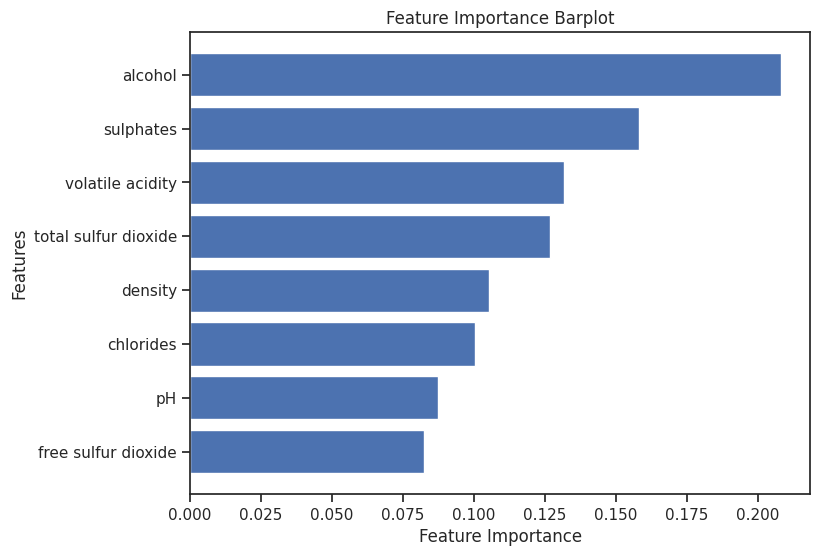

In [67]:
plt.figure(figsize=(8, 6))
plt.barh(feat_names, feat_importance)
plt.title('Feature Importance Barplot')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

From the feature importances, we can eliminate the features that are less importance when compared to other features. This will aid in improvement of accuracy. Here we observe, after dropping the features using RFE function defined earlier(which basically does feature importance done in Random forest but using lasso in this case) we get the importance of these features, and alcohol has more importance compared to free sulfur dioxide.

In [68]:
y_pred_train = randomf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train, average='weighted')
recall = recall_score(y_train, y_pred_train, average='weighted')
f1 = f1_score(y_train, y_pred_train, average='weighted')

print('Model performance on Training set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Training set
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [69]:
y_pred_valid = randomf.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_valid)
precision = precision_score(y_valid, y_pred_valid, average='weighted')
recall = recall_score(y_valid, y_pred_valid, average='weighted')
f1 = f1_score(y_valid, y_pred_valid, average='weighted')

print('Model performance on Validation set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Validation set
Accuracy: 0.7875
Precision: 0.7877
Recall: 0.7875
F1 Score: 0.7876


In [70]:
y_pred = randomf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Model performance on Test set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Test set
Accuracy: 0.7625
Precision: 0.7625
Recall: 0.7625
F1 Score: 0.7625


We can observe that the training accuracy is 100 percent, and validation accuracy is 78.75 percent.  The test also gives accuracy of 76.25 percent which is quite good for Random Forest on this dataset.

Comparing all the classification models, Random forest gives the highest validation accuracy of 78.75 percent which will
boost the ensemble model as well.

# 5:

In [71]:
ensemble = VotingClassifier(estimators=[
    ('lr', softmax_reg),
    ('svm', support_vec),
    ('rf', randomf)
], voting='hard')

In [72]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=0.1, random_state=42)),
                             ('svm',
                              SVC(C=0.1, kernel='poly', probability=True,
                                  random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                                     random_state=42))])

In [73]:
for name, est in ensemble.named_estimators_.items():
    print(name, "=", ensemble.score(X_test, y_test))

lr = 0.74375
svm = 0.74375
rf = 0.74375


In [74]:
y_pred_valid = ensemble.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_valid)
precision = precision_score(y_valid, y_pred_valid, average='weighted')
recall = recall_score(y_valid, y_pred_valid, average='weighted')
f1 = f1_score(y_valid, y_pred_valid, average='weighted')

print('Model performance on Validation set for hard voting')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Validation set for hard voting
Accuracy: 0.7781
Precision: 0.7780
Recall: 0.7781
F1 Score: 0.7777


In [75]:
ensemble_soft = VotingClassifier(estimators=[
    ('lr', softmax_reg),
    ('svm', support_vec),
    ('rf', randomf)
], voting='soft')

In [76]:
ensemble_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=0.1, random_state=42)),
                             ('svm',
                              SVC(C=0.1, kernel='poly', probability=True,
                                  random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                                     random_state=42))],
                 voting='soft')

In [77]:
for name, est in ensemble_soft.named_estimators_.items():
    print(name, "=", ensemble_soft.score(X_test, y_test))

lr = 0.75
svm = 0.75
rf = 0.75


In [78]:
y_pred_valid = ensemble_soft.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_valid)
precision = precision_score(y_valid, y_pred_valid, average='weighted')
recall = recall_score(y_valid, y_pred_valid, average='weighted')
f1 = f1_score(y_valid, y_pred_valid, average='weighted')

print('Model performance on Validation set for soft voting')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Model performance on Validation set for soft voting
Accuracy: 0.7937
Precision: 0.7943
Recall: 0.7937
F1 Score: 0.7939


From the ensemble Voting classifier above, we observe that  soft voting gives 79.37 and Hard Voting gives an validation accuracy of 77.81. So we will use this model with soft voting on the test set.

In [80]:
y_pred = ensemble_soft.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Ensemble Model performance on Test set')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Ensemble Model performance on Test set
Accuracy: 0.7500
Precision: 0.7501
Recall: 0.7500
F1 Score: 0.7490


The soft voting classifier gives an accuracy of 75 percent on test data which is outperforms individual classifiers with their best parameters.

# References:



1. Dataset:Red wine - https://archive.ics.uci.edu/dataset/186/wine+quality
2. https://github.com/ageron/handson-ml3/tree/main
3. https://www.scribbr.com/methodology/stratified-sampling/#:~:text=What%20is%20stratified%20sampling%3F,using%20another%20probability%20sampling%20method.
4. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition by Aurélien Géron, October 2022, O'Reilly Media, Inc. ISBN: 9781098125974.
5. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html


